#**Forecasting Future Employee Engagement: Leveraging Regression Models and Historical Data to Identify Key Drivers**

#1. Importing  Dataset

In [2]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
csv_file = 'All_Employee_Survey__AES__2022_-_2023.csv'

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(csv_file, nrows=10000)


In [3]:
data.head()

,Administration,VISN/District,Group,Level,Occupation,Item,N,2023 Score,2022 Score
0,1246155 - DEPARTMENT OF VETERANS AFFAIRS,NaN,NaN,0 - va,NaN,Burnout Symptoms: 0,334220,0.516337,0.486819
1,1246155 - DEPARTMENT OF VETERANS AFFAIRS,NaN,NaN,0 - va,NaN,Burnout Symptoms: 1,334220,0.232739,0.230276
2,1246155 - DEPARTMENT OF VETERANS AFFAIRS,NaN,NaN,0 - va,NaN,Burnout Symptoms: 2,334220,0.186536,0.210049
3,1246155 - DEPARTMENT OF VETERANS AFFAIRS,NaN,NaN,0 - va,NaN,Burnout Symptoms: 3,334220,0.047953,0.056447
4,1246155 - DEPARTMENT OF VETERANS AFFAIRS,NaN,NaN,0 - va,NaN,Best Places to Work,334220,71.884278,68.413286


In [4]:
data.tail()

,Administration,VISN/District,Group,Level,Occupation,Item,N,2023 Score,2022 Score
9995,1245548 - Veterans Benefits Administration,1661081 - Continental District - Overall Roll Up,1248947 - St Paul RO,3 - stano,NaN,Personal Accomplishment,649,3.958009,3.870175
9996,1245548 - Veterans Benefits Administration,1661081 - Continental District - Overall Roll Up,1248947 - St Paul RO,3 - stano,NaN,Clear Expectations,649,4.239875,4.290493
9997,1245548 - Veterans Benefits Administration,1661081 - Continental District - Overall Roll Up,1248947 - St Paul RO,3 - stano,NaN,Talents Used,649,3.601575,3.609155
9998,1245548 - Veterans Benefits Administration,1661081 - Continental District - Overall Roll Up,1248947 - St Paul RO,3 - stano,NaN,Goal Aligned Work,649,4.302034,4.301754
9999,1245548 - Veterans Benefits Administration,1661081 - Continental District - Overall Roll Up,1248947 - St Paul RO,3 - stano,NaN,No Fear of Reprisal,649,4.006483,3.970588


In [5]:
data.shape

(10000, 9)

#2. Pre-processing

In [6]:
data.isna().sum()

Administration        0
VISN/District       864
Group              5952
Level                 0
Occupation        10000
Item                  0
N                     0
2023 Score            0
2022 Score           96
dtype: int64

In [7]:
# Drop multiple columns
data = data.drop(['Group', 'Occupation'], axis=1)


In [8]:
data=data.dropna()

In [9]:
data.isna().sum()

Administration    0
VISN/District     0
Level             0
Item              0
N                 0
2023 Score        0
2022 Score        0
dtype: int64

In [10]:
data.shape

(9040, 7)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9040 entries, 864 to 9999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Administration  9040 non-null   object 
 1   VISN/District   9040 non-null   object 
 2   Level           9040 non-null   object 
 3   Item            9040 non-null   object 
 4   N               9040 non-null   int64  
 5   2023 Score      9040 non-null   float64
 6   2022 Score      9040 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 565.0+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Iterate over object columns and encode them
for column in data.select_dtypes(include=['object']):
    data[column] = encoder.fit_transform(data[column])

# Verify the converted columns
print(data.dtypes)

Administration      int32
VISN/District       int32
Level               int32
Item                int32
N                   int64
2023 Score        float64
2022 Score        float64
dtype: object


In [13]:
data.head()

,Administration,VISN/District,Level,Item,N,2023 Score,2022 Score
864,0,3,0,5,308,0.597403,0.539033
865,0,3,0,6,308,0.178571,0.167286
866,0,3,0,7,308,0.165584,0.234201
867,0,3,0,8,308,0.045455,0.048327
868,0,3,0,4,308,73.056359,71.019469


#3. Exploratory Data Analysis

Text(0, 0.5, 'Frequency')

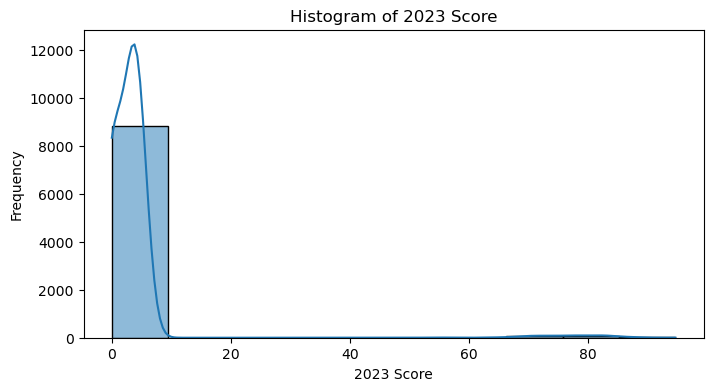

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.DataFrame(data)

# Visualization 1: Histogram of '2023 Score'
plt.figure(figsize=(8, 4))
sns.histplot(df['2023 Score'], bins=10, kde=True)
plt.title('Histogram of 2023 Score')
plt.xlabel('2023 Score')
plt.ylabel('Frequency')



Text(0.5, 1.0, 'Box Plot of 2023 Score')

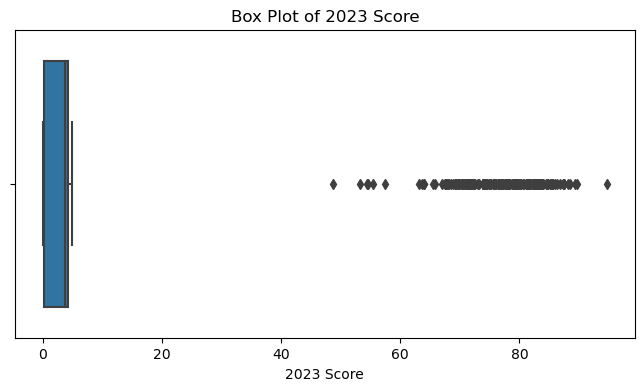

In [15]:
# Visualization 2: Box plot of '2023 Score'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['2023 Score'])
plt.title('Box Plot of 2023 Score')

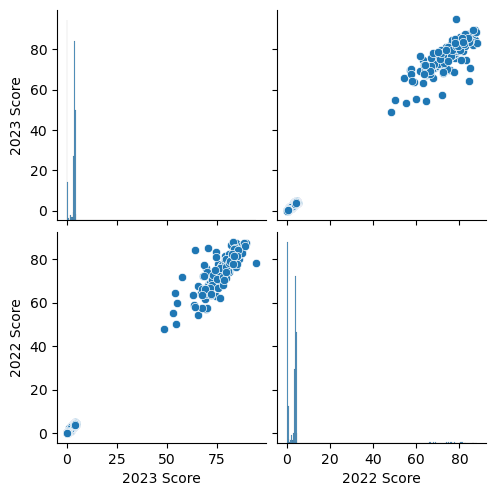

In [16]:
# Visualization 3: Pairplot for '2023 Score' and '2022 Score'
sns.pairplot(df[['2023 Score', '2022 Score']])

Text(0, 0.5, '2023 Score')

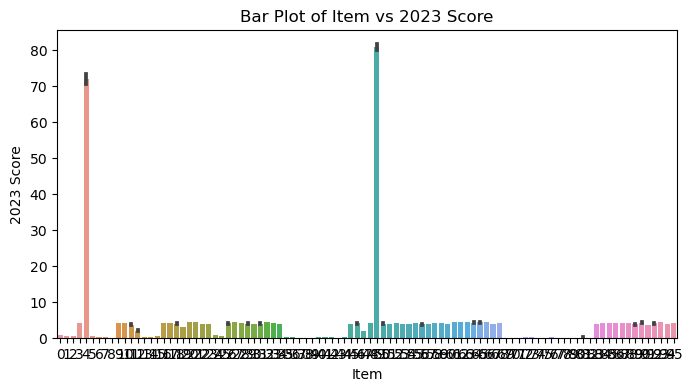

In [17]:
# Visualization 4: Bar plot of 'Item' vs '2023 Score'
plt.figure(figsize=(8, 4))
sns.barplot(x='Item', y='2023 Score', data=df)
plt.title('Bar Plot of Item vs 2023 Score')
plt.xlabel('Item')
plt.ylabel('2023 Score')

Text(0, 0.5, '2023 Score')

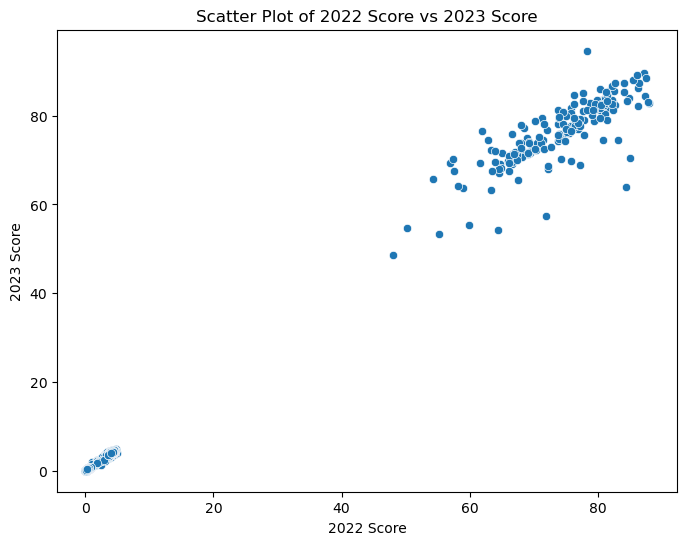

In [18]:
# Visualization 5: Scatter plot of '2022 Score' vs '2023 Score'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='2022 Score', y='2023 Score', data=df)
plt.title('Scatter Plot of 2022 Score vs 2023 Score')
plt.xlabel('2022 Score')
plt.ylabel('2023 Score')

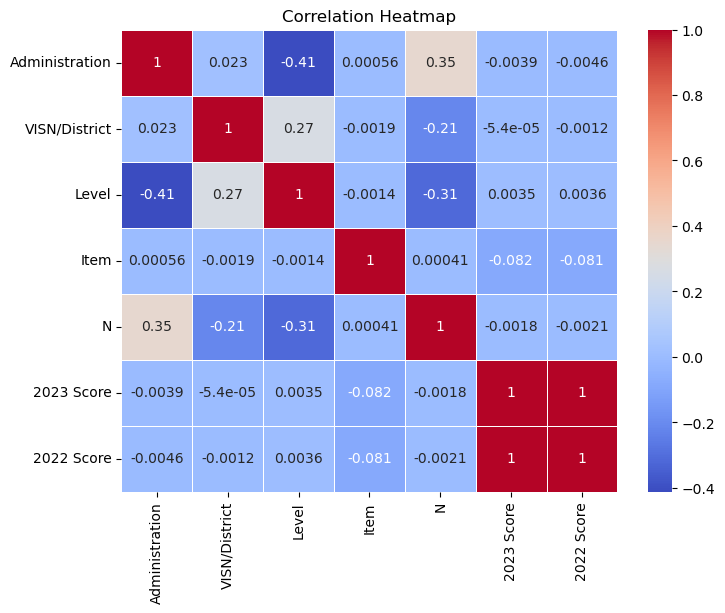

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.DataFrame(data)

# Create a correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#4. Random Forest Regression




In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Split the dataset into features and target variable
X = data[['Administration', 'VISN/District', 'Level', 'Item', 'N']]
y = data['2022 Score']

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2:.2f}')


Mean Squared Error (MSE): 0.90
R-squared (R2): 0.99


#5. Decision Tree Regression

In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



# Split the dataset into features and target variable
X = data[['Administration', 'VISN/District', 'Level', 'Item', 'N']]
y = data['2022 Score']

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)  # You can adjust hyperparameters as needed
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2:.2f}')


Mean Squared Error (MSE): 1.25
R-squared (R2): 0.99


#6. KNN Regression

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



# Split the dataset into features and target variable
X = data[['Administration', 'VISN/District', 'Level', 'Item', 'N']]
y = data['2022 Score']

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the KNN Regressor model
model = KNeighborsRegressor(n_neighbors=3)  # You can adjust the number of neighbors (n_neighbors) and other hyperparameters
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2:.2f}')


Mean Squared Error (MSE): 132.49
R-squared (R2): -0.24
